# Uber - Data Analytics

**Descrição**: O conjunto de dados contém detalhes sobre distribuição de partilhamento de corridas das  
operações do Uber no ano de 2024, fornecendo insights valiosos para padrões de reserva, desempenho de veículos,  
fluxos de receitas, comportamentos de cancelamento e métricas de satisfação do cliente.

📊 __Dataset Overview__  

O dataset captura 148k de reservas de múltiplos tipos de veículos e providencia uma visão completa sobre
operações de corridas compartilhadas, incluindo corridas de sucesso, cancelamentos, comportamentos de clientes e
métricas de finanças

__Key Statistics:__  

* **Total Booking**: ~ 148k no total.
* **Success Rate**: 65.96% (93k de corridas finalizadas).
* **Cancellation Rate**: 25% (~ 37k de reservas canceladas)
* **Customer Cancellations**: 19.15% (17k de corridas)
* **Driver Cancellations**: 7.45% (~ 10k de corrida)

📋 __Data Schema__  

O dataset contém as seguintes colunas:

> * **Date**: Data da reserva
> * **Time**: Horário da reserva
> * **Booking ID**: Identificador exclusivo para cada reserva de corrida
> * **Booking Status**: Status da reserva (_Finalizada_, _Cancelada pelo cliente_, _Cancelada pelo motorista_, etc.)
> * **Customer ID**: Identificador exclusivo de cada cliente
> * **Vehicle Type**: Tipo de veículo (_Go Mini_, _Go Sedan_, _Auto_, _eBike/Bike_, _UberXL_, _Premier Sedan_, etc.)
> * **Pickup Location**: Local do ponto de partida
> * **Drop Location**: Local de destino
> * **Avg VTAT**: Tempo médio de chegada do veículo
> * **Avg CTAT**: Tempo médio de chegada do cliente
> * **Cancelled Rides by Customer**: Sinalizador de cancelamento iniciado pelo cliente
> * **Reason for cancelling by Customer**: Motivo de cancelamento do cliente
> * **Cancelled Rides by Driver**: Sinalizador de cancelamento iniciado pelo motorista
> * **Driver Cancellation Reason**: Motivo de cancelamento do motorista
> * **Incomplete Rides**: Sinalizador de corrida não finalizada
> * **Incomplete Rides Reason**: Motivo da corrida não ter sido finalizada
> * **Booking Value**: Valor total da tarifa da viagem
> * **Ride Distance**: Distância (km) registrada durante a viagem
> * **Driver Ratings**: Avaliação atribuída ao motorista (nota de 1 a 5)
> * **Customer Rating**: Avaliação atribuída ao cliente (nota de 1 a 5)
> * **Payment method**: Forma de pagamento (UPI, Dinheiro, Cartão de Crédito, Carteira d Uber, Cartão de Crédito).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
from datetime import datetime
import os

from typing import Optional, Union, Dict
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
warnings.filterwarnings('ignore', category=pd.errors.IncompatibilityWarning)
print(f'Inicio: {str(datetime.now().strftime('%Y-%m-%d'))}')

Inicio: 2025-08-21


In [3]:
FOLDER_NAME = os.path.basename('csv files')
file_name = 'ncr_ride_bookings.csv'
exists_ok = False

if os.path.exists(FOLDER_NAME):
    full_path = os.path.join(FOLDER_NAME, file_name)
    exists_ok = f'{True}'
else:
    new_folder = os.makedirs('csv_files')
    exists_ok = f'{exists_ok}'

In [4]:
df = pd.read_csv(
    full_path,
    encoding='utf-8',
    thousands='|',
    na_filter=False,
    float_precision='legacy',
    skip_blank_lines=1
)

df.iloc[0:4]

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,null,null,...,null,null,null,null,null,null,null,null,null,null
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,null,null,null,1,Vehicle Breakdown,237,5.73,null,null,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,null,null,null,null,null,627,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,null,null,null,null,null,416,34.02,4.6,5.0,UPI


In [5]:
def fetch_null_values(
    x:pd.DataFrame,
    show:bool=True,
    return_as:str='dict',
    log:bool=False
) -> Optional[Union[Dict[str, int], pd.Series]]:

    null_cols = [cname for cname in x.columns if np.count_nonzero(x[x[cname] == 'null']) > 0]

    if not null_cols:
        message = f'No null columns encountered'
        if log:
            logger.info(message)
        elif show:
            print(message)
        return None

    message = f'Null columns found:\n {null_cols}'

    if log:
        logger.warning(message)
    elif show:
        print(message)

    if return_as == 'dict':
        return na_cols.to_dict()
    elif return_as == 'series':
        return null_cols
    else:
        raise ValueError("Parâmetro 'retornar_como' deve ser 'dict' ou 'series'")

In [6]:
non_value = fetch_null_values(df, False, 'series', False)

In [7]:
try:
    df['Date'] = df['Date'].apply(
        lambda z: pd.to_datetime(z, format='%Y-%m-%d', yearfirst=True, errors='coerce')
    )
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
except Exception:
    raise ValueError(f'Erro de conversão na coluna: -> {df.columns[0]}')

In [8]:
def drop_nan_axis(df:pd.DataFrame, cols:list):
    for cname in cols:
        df[cname] = df[cname].replace('null', np.nan)

    drop_idx = df[df[cols].isna().all(axis=1)].index
    return drop_idx

In [9]:
list_drop_idx = drop_nan_axis(df, non_value)

In [10]:
df = df.drop(index=list_drop_idx, axis=0).set_index('Date')

In [11]:
from typing import List, Union, Tuple

def segment_dataframe(
    df:pd.DataFrame, 
    cols:Union[List[str], List[int]], 
    by_position:bool=True
) -> Tuple[pd.DataFrame, pd.DataFrame]:

    if by_position:
        # Valida indices
        if any(i >= df.shape[1] or i < 0 for i in cols):
            raise IndexError(f'Índice de coluna fora do intervalo válido')
        selected = df.iloc[:, cols].copy()
        remaining = df.drop(df.columns[cols], axis=1).copy()
    else:
        # Validar nomes das colunas
        missing = set(cols) - set(df.columns)
        if missing:
            raise KeyError(f'Colunas não encontradas: {missing}')
        selected = df[cols].copy()
        remaining = df.drop(columns=cols, axis=1).copy()

    return selected, remaining

In [12]:
df_order_set, df_vehtrip_set = segment_dataframe(df, cols=[0, 1, 2, 3, 4, 5, 6, 10, 12, 14, 19], by_position=True)

In [13]:
df_order_set.tail(4)['Vehicle Type']

Date
2024-11-24          Go Mini
2024-09-18         Go Sedan
2024-10-05             Auto
2024-03-10    Premier Sedan
Name: Vehicle Type, dtype: object

In [14]:
size_booking_status = df_order_set.groupby(['Booking Status'], observed=True).size().sort_values(ascending=False)
size_booking_status

Booking Status
Completed                93000
Cancelled by Driver      27000
Cancelled by Customer    10500
Incomplete                9000
dtype: int64

In [15]:
size_vehicle_type = df_order_set.groupby(['Vehicle Type'], observed=True).size().sort_values(ascending=False)
size_vehicle_type

Vehicle Type
Auto             34738
Go Mini          27791
Go Sedan         25181
Bike             21014
Premier Sedan    16831
eBike             9811
Uber XL           4134
dtype: int64

In [16]:
size_reason_cancel_customer = df_order_set.groupby(['Reason for cancelling by Customer'], observed=True).size().sort_values(ascending=False)
size_reason_cancel_customer

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
dtype: int64

In [17]:
size_reason_cancel_driver = df_order_set.groupby(['Driver Cancellation Reason']).size().sort_values(ascending=False)
size_reason_cancel_driver

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
dtype: int64

In [18]:
size_payment_method =  df.groupby(['Payment Method'], observed=True).size().sort_values(ascending=False)
size_payment_method

Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
dtype: int64

In [19]:
df_vehtrip_set.head(2)

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
Date,,,,,,,,,
2024-11-29,4.9,14.0,NaN,NaN,1,237,5.73,NaN,NaN
2024-08-23,13.4,25.8,NaN,NaN,NaN,627,13.58,4.9,4.9


In [20]:
df_vehtrip_set.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500,102000,10500,27000,9000,102000,102000,93000,93000
unique,181,351,1,1,1,2566,4901,21,21
top,9.4,24.8,1,1,1,176,9.61,4.3,4.9
freq,1259,401,10500,27000,9000,177,43,14081,11642


In [21]:
df = df.drop_duplicates(subset=['Ride Distance'], keep='first')

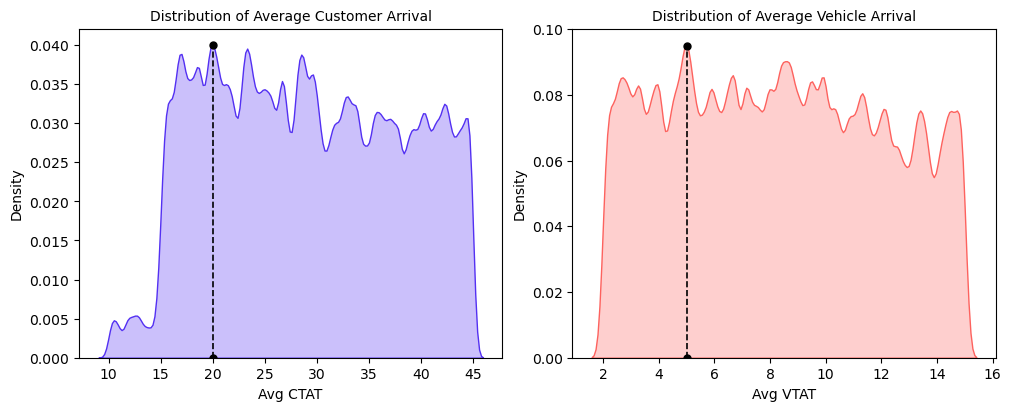

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), layout='constrained')

sns.kdeplot(df['Avg CTAT'].astype(float), bw_adjust=.2, color='#5330f2', fill=True,
                common_norm=0, alpha=.3, ax=axes[0])
axes[0].plot([20, 20], [0, 0.040], color='black', linestyle='dashed', lw=1.2, marker='o', markersize=5)
axes[0].set_title(f'Distribution of Average Customer Arrival', fontsize=10)

sns.kdeplot(df['Avg VTAT'].astype(float), bw_adjust=.2, color='#FD625E', fill=True,
                common_norm=0, alpha=.3, ax=axes[1])

axes[1].plot([5, 5], [0, 0.095], color='black', linestyle='dashed', lw=1.2, marker='o', markersize=5)
axes[1].set_title(f'Distribution of Average Vehicle Arrival', fontsize=10)

plt.show()

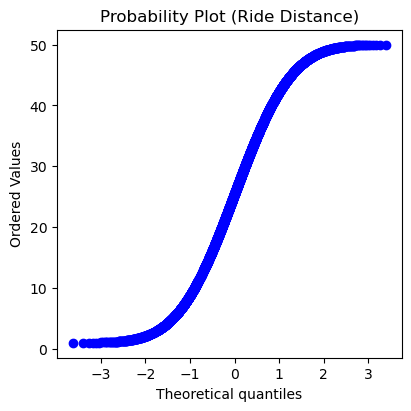

In [23]:
# Apurando o diagnóstico de distribuição da feature "Ride Distance".

from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4), layout='constrained')
qq_plot = stats.probplot(df['Ride Distance'].astype(float), plot=ax)

plt.title(f'Probability Plot (Ride Distance)')
plt.show()

In [24]:
daily_stats = df.groupby(df.index).agg({'Booking ID': 'count', 'Booking Value': 'sum'}).reset_index()

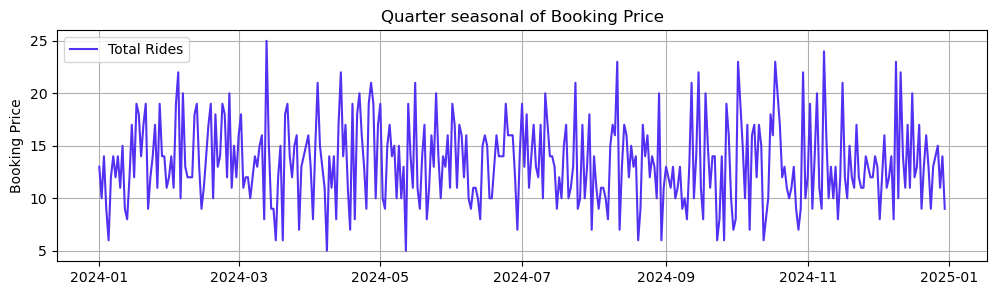

In [25]:
fig = plt.figure(figsize=(12, 3))
plt.plot(daily_stats['Date'], daily_stats['Booking ID'], label="Total Rides", color='#5330f2')

plt.title(f'Quarter seasonal of Booking Price')
plt.ylabel(f'Booking Price')
plt.legend().set_visible(True)
plt.grid(True)
plt.show()

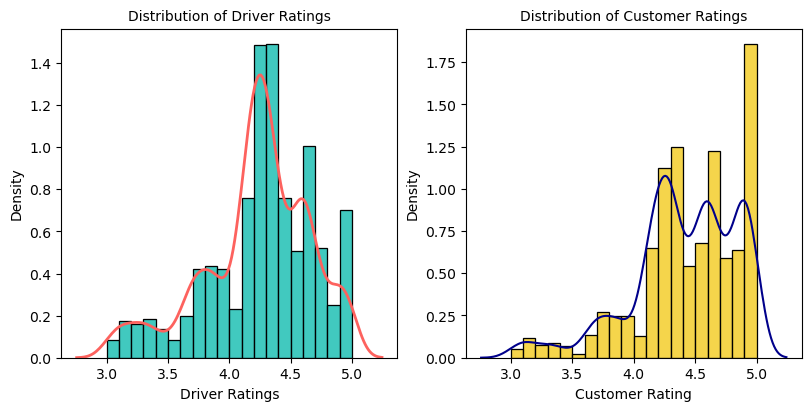

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), layout='constrained')

sns.histplot(df['Driver Ratings'].astype(float), bins=20, color='#01B8AA', stat='density', ax=axes[0])
sns.kdeplot(df['Driver Ratings'].astype(float), ax=axes[0], color="#FD625E", linewidth=2)

axes[0].set_title('Distribution of Driver Ratings', fontsize=10)


sns.histplot(df['Customer Rating'].astype(float), bins=20, color='#F2C80F', stat='density', ax=axes[1])
sns.kdeplot(df['Customer Rating'].astype(float), ax=axes[1], color="darkblue", linewidth=1.5)

axes[1].set_title('Distribution of Customer Ratings', fontsize=10)

plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [28]:
df = df.drop(columns=['Time'], axis=1, errors='raise')

In [29]:
def label_enc(df:pd.DataFrame) -> None:
    cat_cols = [cname for cname in df.select_dtypes(include=['object']).columns.to_numpy().ravel()]

    try:
        x, y = segment_dataframe(df, cols=cat_cols, by_position=False)
    except TypeError as te:
        raise ValueError(f'Erro no formato da coluna: \n\n[{te}]')

    labels = {}
    for cols in x.columns:
        le = LabelEncoder()
        df[cols] = le.fit_transform(df[cols])
        labels[cols] = le
    
    return df

In [30]:
outcome = label_enc(df)

In [31]:
x = outcome.drop(['Booking Status'], axis=1)
y = df.iloc[:, 1].values

In [32]:
MODELS = {
    'logistic': LogisticRegression(),
    'random forest': RandomForestClassifier(),
    'svm': SVC(),
    'naive_bayes': GaussianNB(),
    'neighbors': KNeighborsClassifier()
}

In [33]:
stand = StandardScaler()
x = stand.fit_transform(x)

try:
    from xgboost import XGBClassifier
    MODELS["XGBoost"] = XGBClassifier(eval_metric='mlogloss')
except ModuleNotFoundError as e:
    print(f'Módulo {e.name} não encontrado')

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
accuracies = {}
for name, model in MODELS.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc= accuracy_score(y_test, y_pred) * 100
    accuracies[name] = round(acc, 2)

In [36]:
accuracies

{'logistic': 100.0,
 'random forest': 100.0,
 'svm': 100.0,
 'naive_bayes': 100.0,
 'neighbors': 100.0,
 'XGBoost': 100.0}